# About Dataset


<img src="https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/Angryman.jpg?raw=True" alt="Drawing" style="width: 300px;"/>



Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's

products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's

services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition.

By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling 

techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.

**Link to dateset:** https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

## Aims

The goal of this notebook is to discover insights by performing customer segmentation using k-means clustering algorithm and building the classification model to predict the churn probability.


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
import plotly.express as px
from datetime import datetime, date
warnings.filterwarnings("ignore")

In [2]:
#Read datset
df = pd.read_csv('D:\DataSet\customer_churn_dataset-training-master.csv')
df

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
0                18.0          Standard          Annual       932.00   
1                 8.0             Basic         Monthly       557.00   
2                18.0             Basic       Quarterly       185.00   
3                 7.0          Standard         Monthly       396.00   
4                 8.0             Basic         Monthly       617.00   
...               ...               ...             ...          ...   
440828            3.0           Premium          Annual       716.38   
440829           20.0           Premium          Annual       745.38   
440830            5.0          Standard       Quarterly       977.31   
440831            0.0          Standard       Quarterly       602.55   
440832           14.0           Premium       Quarterly       567.77   

        Last Interaction  Churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440833 rows x 12 columns]

# Data Cleaning

In [3]:
# Change column names
df.columns = [i.lower().replace(' ','_') for i in df.columns]
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [4]:
# Check missing values
df.isnull().sum()

customerid           1
age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [5]:
# Drop missing value
df.dropna(axis = 0 , inplace = True)

In [6]:
# Check Duplicated values
df.duplicated().sum()

0

In [7]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  float64
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage_frequency    440832 non-null  float64
 5   support_calls      440832 non-null  float64
 6   payment_delay      440832 non-null  float64
 7   subscription_type  440832 non-null  object 
 8   contract_length    440832 non-null  object 
 9   total_spend        440832 non-null  float64
 10  last_interaction   440832 non-null  float64
 11  churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [8]:
#Check data accuracy
frame = []
for i in df.columns:
    print('Name of columns: {}'.format(i))
    print('Unique Values: {}'.format(df[i].unique()))
    print('Number of Unique Values: {}'.format(df[i].nunique()))
    print('----------------------------------------------------')   

Name of columns: customerid
Unique Values: [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]
Number of Unique Values: 440832
----------------------------------------------------
Name of columns: age
Unique Values: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]
Number of Unique Values: 48
----------------------------------------------------
Name of columns: gender
Unique Values: ['Female' 'Male']
Number of Unique Values: 2
----------------------------------------------------
Name of columns: tenure
Unique Values: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]
Number of Unique Values: 60
-------------------------------

# Exploratory Data Analysis

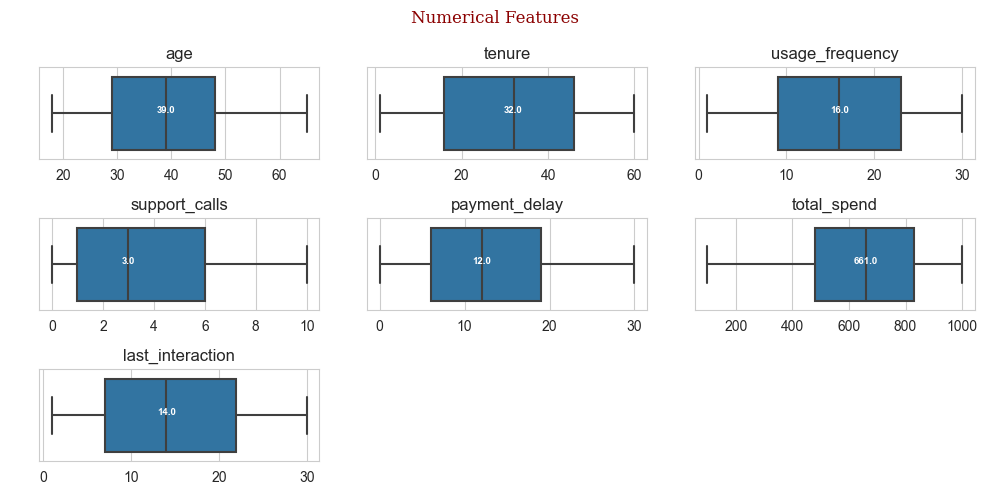

In [9]:
# Check numerical columns
col_features = df.select_dtypes(['float64' , 'int64'])
col_features = col_features[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = col_features , x = j)
    #Calculate median
    median = df[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

In [10]:
# Additional Info
col_features.describe().T

count        mean         std    min    25%    50%  \
age               440832.0   39.373153   12.442369   18.0   29.0   39.0   
tenure            440832.0   31.256336   17.255727    1.0   16.0   32.0   
usage_frequency   440832.0   15.807494    8.586242    1.0    9.0   16.0   
support_calls     440832.0    3.604437    3.070218    0.0    1.0    3.0   
payment_delay     440832.0   12.965722    8.258063    0.0    6.0   12.0   
total_spend       440832.0  631.616223  240.803001  100.0  480.0  661.0   
last_interaction  440832.0   14.480868    8.596208    1.0    7.0   14.0   

                    75%     max  
age                48.0    65.0  
tenure             46.0    60.0  
usage_frequency    23.0    30.0  
support_calls       6.0    10.0  
payment_delay      19.0    30.0  
total_spend       830.0  1000.0  
last_interaction   22.0    30.0

- It seems there are no outliers and anomalies in numerical features.

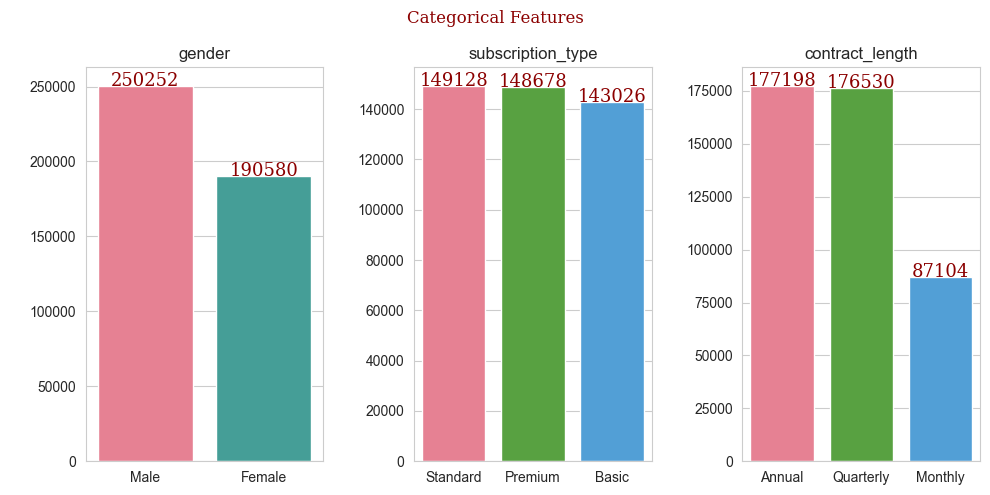

In [11]:
col_categorical = df.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = df[j].value_counts().sort_values(ascending = False).to_frame() ,x = df[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'husl' )
    #Create text
    text = df[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

Text(0.5, 1.0, 'Target Variable')

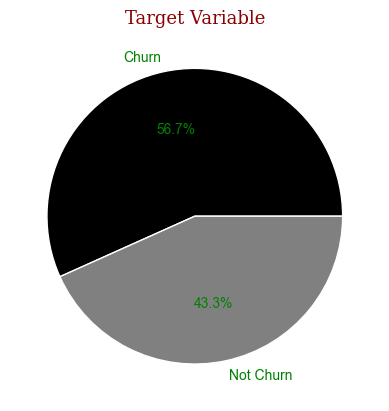

In [12]:
# Target variable
plt.pie(data = df['churn'].value_counts().to_frame() ,labels = ['Churn','Not Churn'], x = 'churn' , autopct = '%1.1f%%' ,colors = ['black','grey'],textprops={'color':"g"} )
plt.title('Target Variable' , fontdict = font)

- The target variables are imbalance. We will deal with this later.

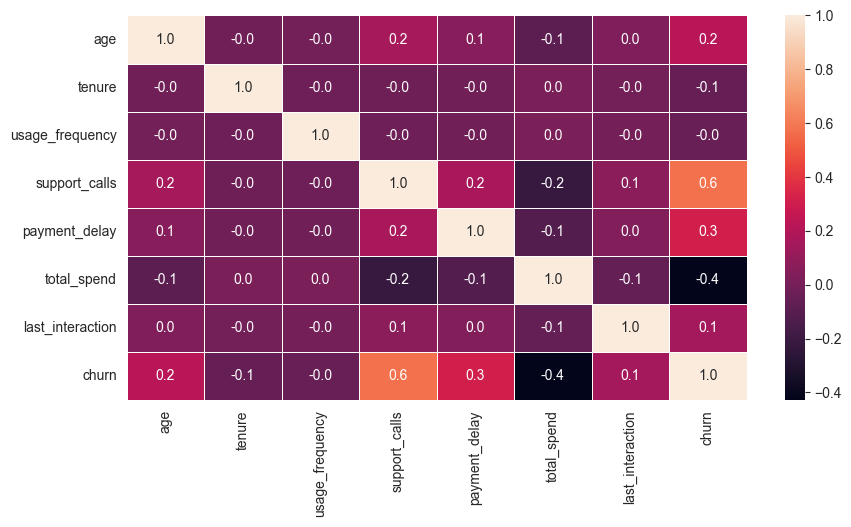

In [13]:
matrix = df[['age', 'gender', 'tenure', 'usage_frequency','support_calls', 'payment_delay','contract_length', 'total_spend', 'last_interaction','churn']]

fig,ax=plt.subplots(figsize = (10,5))
sns.heatmap(matrix.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax);

- It seemes there will be no multicollinearity problem.

# Data preprocessing for Clustering analysis

In [14]:
df1 = df.copy()
df1

customerid   age  gender  tenure  usage_frequency  support_calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        payment_delay subscription_type contract_length  total_spend  \
0                18.0          Standard          Annual       932.00   
1                 8.0             Basic         Monthly       557.00   
2                18.0             Basic       Quarterly       185.00   
3                 7.0          Standard         Monthly       396.00   
4                 8.0             Basic         Monthly       617.00   
...               ...               ...             ...          ...   
440828            3.0           Premium          Annual       716.38   
440829           20.0           Premium          Annual       745.38   
440830            5.0          Standard       Quarterly       977.31   
440831            0.0          Standard       Quarterly       602.55   
440832           14.0           Premium       Quarterly       567.77   

        last_interaction  churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440832 rows x 12 columns]

In [15]:
# Label encode data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])
df1['subscription_type'] = le.fit_transform(df1['subscription_type'])
df1['contract_length'] = le.fit_transform(df1['contract_length'])
df1


customerid   age  gender  tenure  usage_frequency  support_calls  \
0              2.0  30.0       0    39.0             14.0            5.0   
1              3.0  65.0       0    49.0              1.0           10.0   
2              4.0  55.0       0    14.0              4.0            6.0   
3              5.0  58.0       1    38.0             21.0            7.0   
4              6.0  23.0       1    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0       1    54.0             15.0            1.0   
440829    449996.0  25.0       0     8.0             13.0            1.0   
440830    449997.0  26.0       1    35.0             27.0            1.0   
440831    449998.0  28.0       1    55.0             14.0            2.0   
440832    449999.0  31.0       1    48.0             20.0            1.0   

        payment_delay  subscription_type  contract_length  total_spend  \
0                18.0                  2                0       932.00   
1                 8.0                  0                1       557.00   
2                18.0                  0                2       185.00   
3                 7.0                  2                1       396.00   
4                 8.0                  0                1       617.00   
...               ...                ...              ...          ...   
440828            3.0                  1                0       716.38   
440829           20.0                  1                0       745.38   
440830            5.0                  2                2       977.31   
440831            0.0                  2                2       602.55   
440832           14.0                  1                2       567.77   

        last_interaction  churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440832 rows x 12 columns]

In [16]:
# Drop unused column
df1.drop(columns = 'customerid' , inplace = True)

In [17]:
df1.columns

Index(['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction', 'churn'],
      dtype='object')

In [18]:
# Scale Data

from sklearn.preprocessing import StandardScaler

#Import model
scaler = StandardScaler()

#Choose columns
numerical_columns = ['age','tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'total_spend','last_interaction']

#Copy Dataframe
df1_scaled = df1.copy()

#Transform each column
for i in numerical_columns:
    df1_scaled[i] = scaler.fit_transform(df1_scaled[[i]])

In [19]:
df1_scaled

age  gender    tenure  usage_frequency  support_calls  \
0      -0.753326       0  0.448760        -0.210511       0.454549   
1       2.059646       0  1.028278        -1.724562       2.083100   
2       1.255940       0 -1.000036        -1.375166       0.780259   
3       1.497051       1  0.390808         0.604748       1.105969   
4      -1.315921       1  0.043097         0.488282       0.454549   
...          ...     ...       ...              ...            ...   
440828  0.211121       1  1.318037        -0.094045      -0.848291   
440829 -1.155179       0 -1.347747        -0.326976      -0.848291   
440830 -1.074809       1  0.216952         1.303541      -0.848291   
440831 -0.914068       1  1.375989        -0.210511      -0.522581   
440832 -0.672956       1  0.970326         0.488282      -0.848291   

        payment_delay  subscription_type  contract_length  total_spend  \
0            0.609620                  2                0     1.247427   
1           -0.601319                  0                1    -0.309865   
2            0.609620                  0                2    -1.854698   
3           -0.722413                  2                1    -0.978462   
4           -0.601319                  0                1    -0.060698   
...               ...                ...              ...          ...   
440828      -1.206788                  1                0     0.352005   
440829       0.851808                  1                0     0.472436   
440830      -0.964600                  2                2     1.435589   
440831      -1.570070                  2                2    -0.120706   
440832       0.125245                  1                2    -0.265139   

        last_interaction  churn  
0               0.293052    1.0  
1              -0.986584    1.0  
2              -1.335575    1.0  
3               1.689018    1.0  
4               0.642043    1.0  
...                  ...    ...  
440828         -0.753923    0.0  
440829         -1.451906    0.0  
440830         -0.637592    0.0  
440831         -1.451906    0.0  
440832          0.758374    0.0  

[440832 rows x 11 columns]

- In this cluster problem, we want to segment customers base on the following five features.

In [20]:
df_cluster = df1_scaled[['usage_frequency','support_calls','tenure','payment_delay','total_spend']]
df_cluster

usage_frequency  support_calls    tenure  payment_delay  total_spend
0             -0.210511       0.454549  0.448760       0.609620     1.247427
1             -1.724562       2.083100  1.028278      -0.601319    -0.309865
2             -1.375166       0.780259 -1.000036       0.609620    -1.854698
3              0.604748       1.105969  0.390808      -0.722413    -0.978462
4              0.488282       0.454549  0.043097      -0.601319    -0.060698
...                 ...            ...       ...            ...          ...
440828        -0.094045      -0.848291  1.318037      -1.206788     0.352005
440829        -0.326976      -0.848291 -1.347747       0.851808     0.472436
440830         1.303541      -0.848291  0.216952      -0.964600     1.435589
440831        -0.210511      -0.522581  1.375989      -1.570070    -0.120706
440832         0.488282      -0.848291  0.970326       0.125245    -0.265139

[440832 rows x 5 columns]

# Modelling Cluster

## Finding number of clusters by Elbow method

In [21]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:
    #Instantiate model in range k
    kmeans = KMeans(n_clusters = k)
    #fit model
    kmeans.fit(df_cluster)
    #append the SSE in k cluster to the list
    inertia.append(kmeans.inertia_)

In [22]:
# Find the elbow spot
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 4 clusters


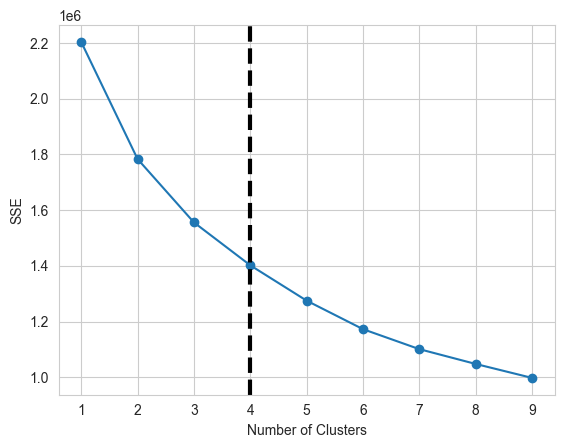

In [23]:
#Plot the graph
plt.plot(num_clusters , inertia , 'o-')    
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#plot vertical line at the elbow spot
plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)

- According to the elbow method, 4 is the optimal number of clusters.

## Label data and assign to dataset

In [24]:
model = KMeans(n_clusters = 4)
model.fit(df_cluster)

KMeans(n_clusters=4)

In [25]:
model.labels_

array([3, 2, 2, ..., 0, 3, 0])

In [26]:
#assign cluster in data set
df['cluster'] = model.labels_
# +1 cluster
df['cluster'] = df['cluster'].apply(lambda x : x+1)

# Cluster analysis

In [27]:
dfs = df[['usage_frequency','support_calls','tenure','payment_delay','total_spend','cluster']]

### Heatmap of each attribute in clusters.

- The value in heatmap shows the median of each attribute in each cluster.

Text(0.5, 1.0, 'Heat map of Median in each cluster')

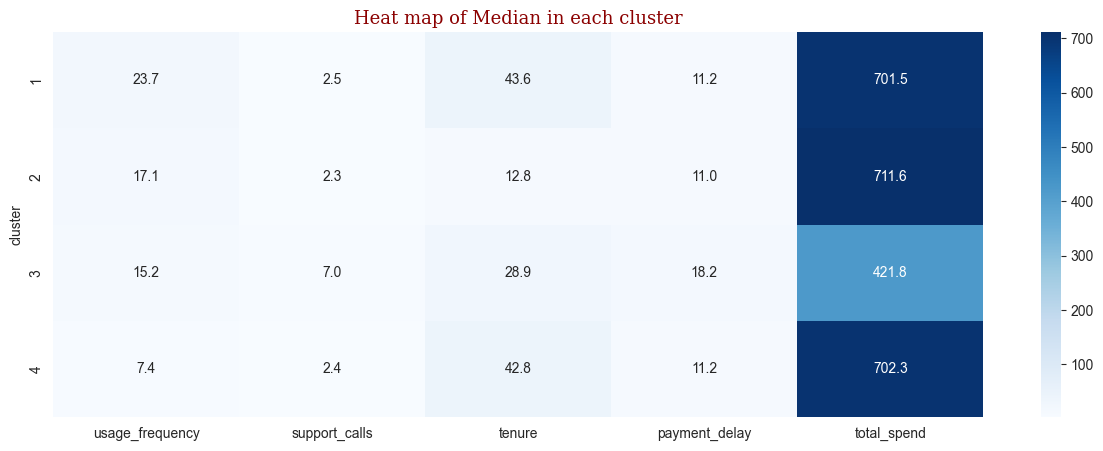

In [28]:
median = dfs.groupby('cluster')['usage_frequency','support_calls','tenure','payment_delay','total_spend'].mean()
fig = plt.figure(figsize = (15,5))
sns.heatmap(data = median , cmap = 'Blues' , annot = True, fmt = ".1f" )
plt.title('Heat map of Median in each cluster' , fontdict = font)

### Visualize members in cluster 1

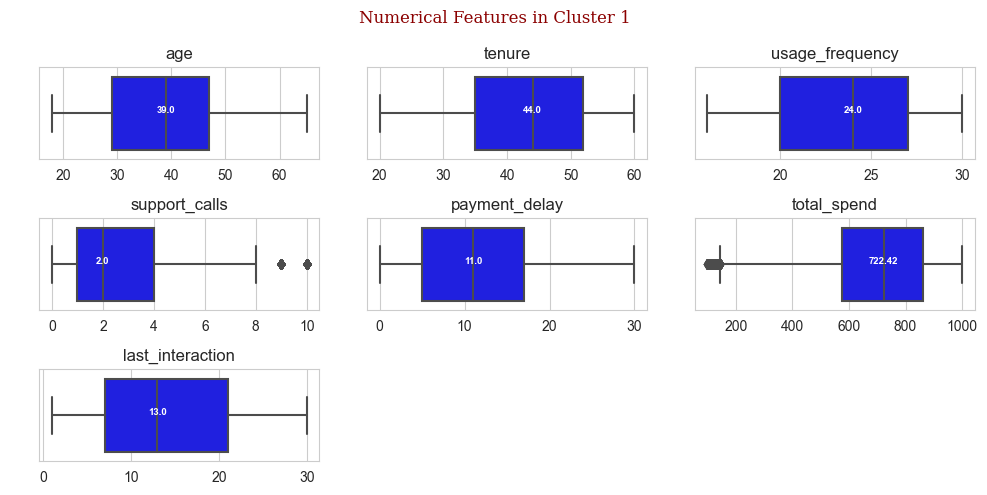

In [116]:
cluster_1 = df[df['cluster'] == 1]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 1' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'blue')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

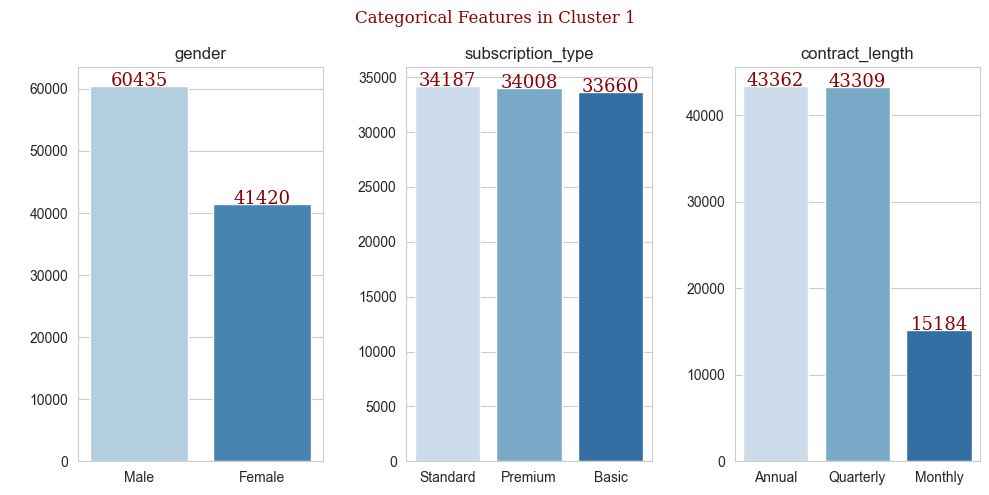

In [117]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 1' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Blues' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

### Visualize members in cluster 2

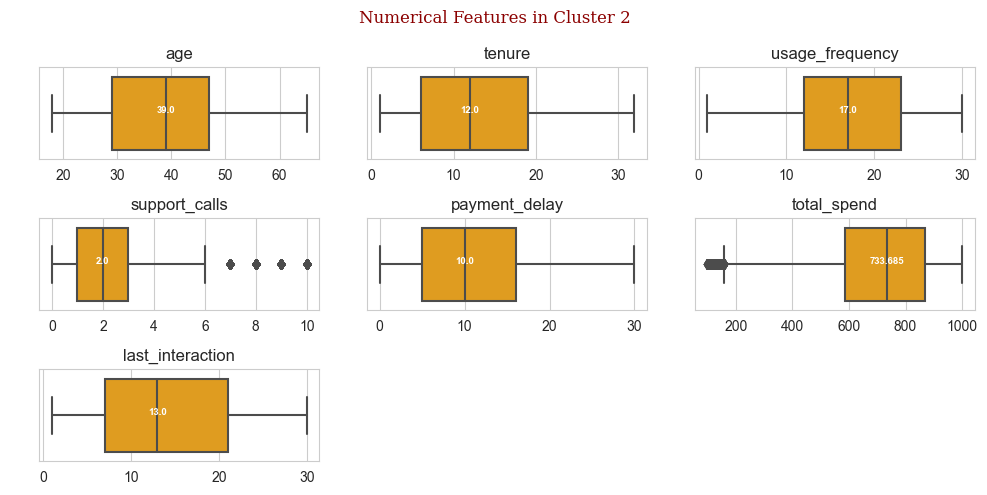

In [118]:
cluster_1 = df[df['cluster'] == 2]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 2' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'orange')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

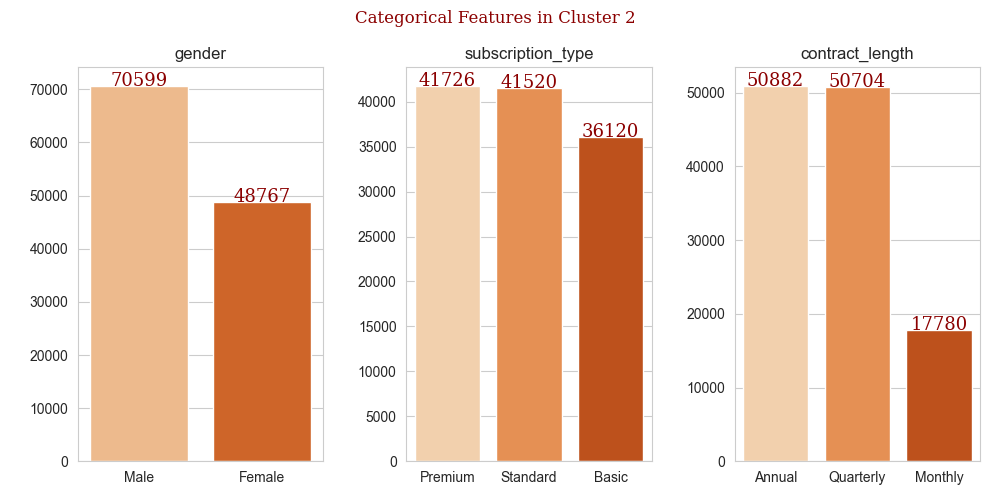

In [119]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 2' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Oranges' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

### Visualize members in Cluster 3

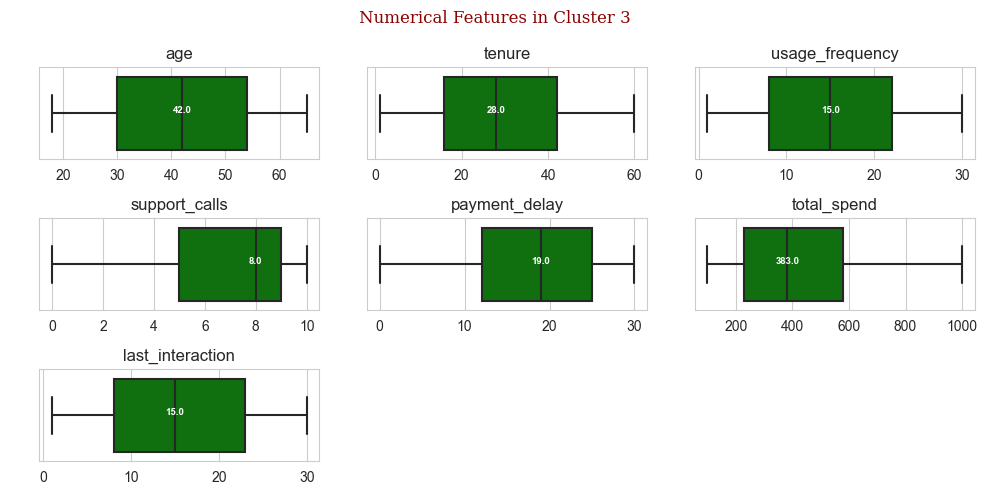

In [33]:
cluster_1 = df[df['cluster'] == 3]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 3' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j , color = 'green')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

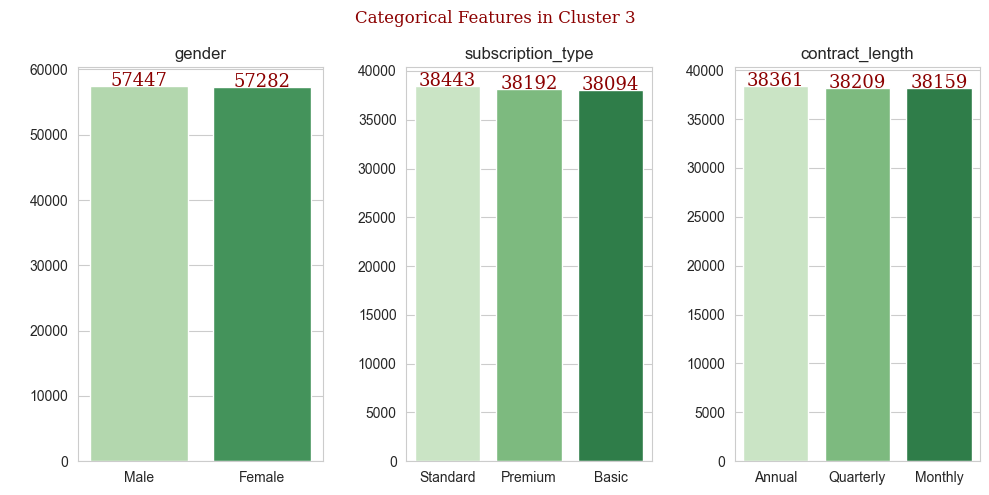

In [34]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 3' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Greens' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

### Visualize members in Cluster 4

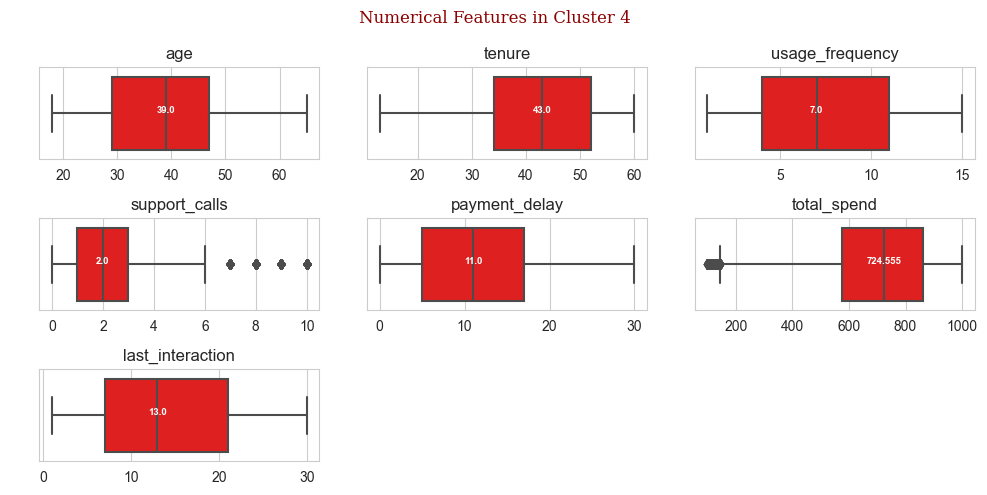

In [120]:
cluster_1 = df[df['cluster'] == 4]
# Check numerical columns
cluster_1_num = cluster_1.select_dtypes(['float64' , 'int64'])
cluster_1_num = cluster_1[['age', 'tenure', 'usage_frequency', 'support_calls','payment_delay', 'total_spend', 'last_interaction']]
#Create font
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }

fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features in Cluster 4' , fontdict = font)
for i,j in enumerate(col_features):
    ax = fig.add_subplot(3,3,i+1)
    ax = sns.boxplot(data = cluster_1_num , x = j, color = 'red')
    #Calculate median
    median = cluster_1_num[j].median()
    #Plot median in the graph
    ax.text(median , ax.get_yticks(), s = '{}'.format(median)  ,horizontalalignment='center',size='x-small',color='w',weight='semibold')
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
    

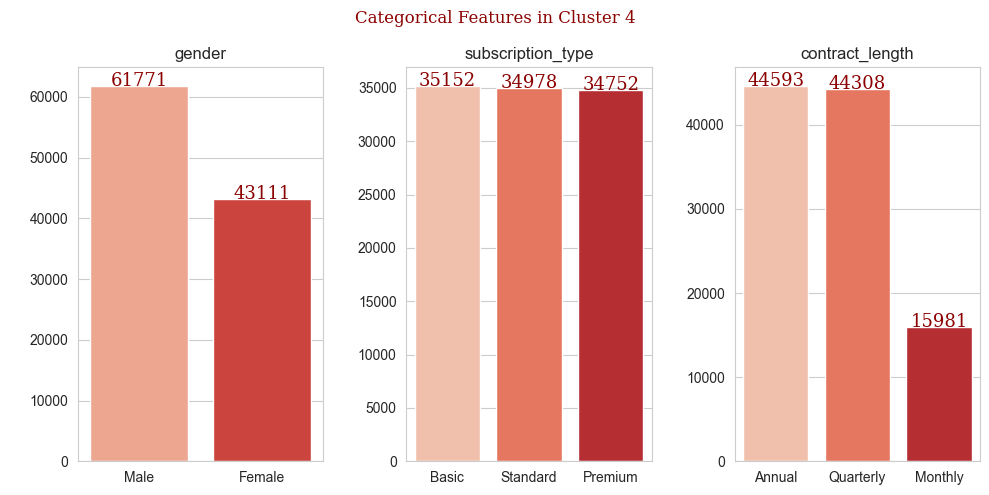

In [121]:
cluster_1_object = cluster_1.select_dtypes('object')

fig = plt.figure(figsize = (10,5))
fig.suptitle('Categorical Features in Cluster 4' , fontdict = font)
for i,j in enumerate(col_categorical):
    ax = fig.add_subplot(1,3,i+1)
    #Recalculate data frame
    ax = sns.barplot(data = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame() ,x = cluster_1_object[j].value_counts().sort_values(ascending = False).to_frame().index, y = j , palette = 'Reds' )
    #Create text
    text = cluster_1_object[j].value_counts()
    for x,y in enumerate(text):
        ax.text(x,y,y,horizontalalignment='center' , fontdict = font)
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)
    
plt.tight_layout()
    

## Visualize Customer churn in each cluster

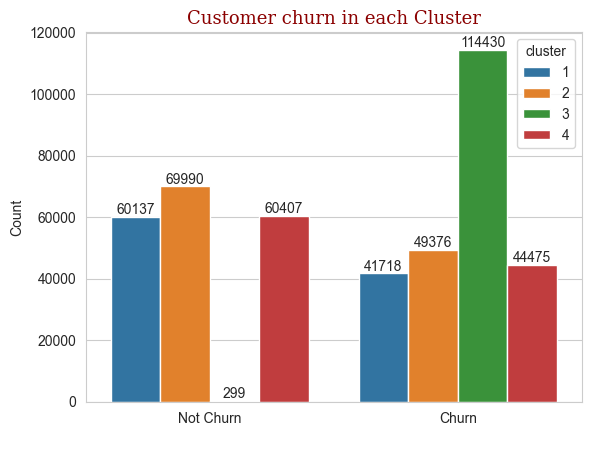

In [135]:
ax = sns.countplot(df , x = 'churn' , hue = 'cluster')
plt.title('Customer churn in each Cluster' , fontdict= font)
plt.xticks(ticks = [0  , 1] , labels = ['Not Churn','Churn'])
plt.xlabel(' ')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i)

Interestingly, Most of the customers who churn are in ***cluster number three.***

The cluster three is characterized by the customer who is in middle-age (Around 40 years old) , spent less compared to other clusters and has high number of support calls.

In [138]:
df[df['cluster'] == 3].median()

customerid         130752.00
age                    42.00
tenure                 28.00
usage_frequency        15.00
support_calls           8.00
payment_delay          19.00
total_spend           383.00
last_interaction       15.00
churn                   1.00
cluster                 3.00
dtype: float64

# Data preprocessing for classification algorithm

In [37]:
df2 = df.copy()
df2

customerid   age  gender  tenure  usage_frequency  support_calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        payment_delay subscription_type contract_length  total_spend  \
0                18.0          Standard          Annual       932.00   
1                 8.0             Basic         Monthly       557.00   
2                18.0             Basic       Quarterly       185.00   
3                 7.0          Standard         Monthly       396.00   
4                 8.0             Basic         Monthly       617.00   
...               ...               ...             ...          ...   
440828            3.0           Premium          Annual       716.38   
440829           20.0           Premium          Annual       745.38   
440830            5.0          Standard       Quarterly       977.31   
440831            0.0          Standard       Quarterly       602.55   
440832           14.0           Premium       Quarterly       567.77   

        last_interaction  churn  cluster  
0                   17.0    1.0        4  
1                    6.0    1.0        3  
2                    3.0    1.0        3  
3                   29.0    1.0        3  
4                   20.0    1.0        1  
...                  ...    ...      ...  
440828               8.0    0.0        4  
440829               2.0    0.0        2  
440830               9.0    0.0        1  
440831               2.0    0.0        4  
440832              21.0    0.0        1  

[440832 rows x 13 columns]

In [38]:
# Drop unused columns
df2.drop(columns = ['customerid','cluster'] , inplace = True)

In [39]:
# Re-arrange columns
df2 = df2[['gender','subscription_type', 'contract_length','tenure','age',  'usage_frequency', 'support_calls','payment_delay', 'total_spend','last_interaction', 'churn']]
df2

gender subscription_type contract_length  tenure   age  \
0       Female          Standard          Annual    39.0  30.0   
1       Female             Basic         Monthly    49.0  65.0   
2       Female             Basic       Quarterly    14.0  55.0   
3         Male          Standard         Monthly    38.0  58.0   
4         Male             Basic         Monthly    32.0  23.0   
...        ...               ...             ...     ...   ...   
440828    Male           Premium          Annual    54.0  42.0   
440829  Female           Premium          Annual     8.0  25.0   
440830    Male          Standard       Quarterly    35.0  26.0   
440831    Male          Standard       Quarterly    55.0  28.0   
440832    Male           Premium       Quarterly    48.0  31.0   

        usage_frequency  support_calls  payment_delay  total_spend  \
0                  14.0            5.0           18.0       932.00   
1                   1.0           10.0            8.0       557.00   
2                   4.0            6.0           18.0       185.00   
3                  21.0            7.0            7.0       396.00   
4                  20.0            5.0            8.0       617.00   
...                 ...            ...            ...          ...   
440828             15.0            1.0            3.0       716.38   
440829             13.0            1.0           20.0       745.38   
440830             27.0            1.0            5.0       977.31   
440831             14.0            2.0            0.0       602.55   
440832             20.0            1.0           14.0       567.77   

        last_interaction  churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440832 rows x 11 columns]

In [40]:
# Create dummy variables
df2 = pd.get_dummies(data = df2, columns = ['gender','subscription_type','contract_length'] , drop_first = True)

In [41]:
# Re-arrange columns (again)
df2 = df2[['gender_Male',
       'subscription_type_Premium', 'subscription_type_Standard',
       'contract_length_Monthly', 'contract_length_Quarterly','tenure', 'age', 'usage_frequency', 'support_calls', 'payment_delay',
       'total_spend', 'last_interaction','churn']]
df2

gender_Male  subscription_type_Premium  subscription_type_Standard  \
0                 0                          0                           1   
1                 0                          0                           0   
2                 0                          0                           0   
3                 1                          0                           1   
4                 1                          0                           0   
...             ...                        ...                         ...   
440828            1                          1                           0   
440829            0                          1                           0   
440830            1                          0                           1   
440831            1                          0                           1   
440832            1                          1                           0   

        contract_length_Monthly  contract_length_Quarterly  tenure   age  \
0                             0                          0    39.0  30.0   
1                             1                          0    49.0  65.0   
2                             0                          1    14.0  55.0   
3                             1                          0    38.0  58.0   
4                             1                          0    32.0  23.0   
...                         ...                        ...     ...   ...   
440828                        0                          0    54.0  42.0   
440829                        0                          0     8.0  25.0   
440830                        0                          1    35.0  26.0   
440831                        0                          1    55.0  28.0   
440832                        0                          1    48.0  31.0   

        usage_frequency  support_calls  payment_delay  total_spend  \
0                  14.0            5.0           18.0       932.00   
1                   1.0           10.0            8.0       557.00   
2                   4.0            6.0           18.0       185.00   
3                  21.0            7.0            7.0       396.00   
4                  20.0            5.0            8.0       617.00   
...                 ...            ...            ...          ...   
440828             15.0            1.0            3.0       716.38   
440829             13.0            1.0           20.0       745.38   
440830             27.0            1.0            5.0       977.31   
440831             14.0            2.0            0.0       602.55   
440832             20.0            1.0           14.0       567.77   

        last_interaction  churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440832 rows x 13 columns]

In [42]:
# Scale numrerical feature
scaler = StandardScaler()
numerical_columns = list(df2.iloc[:,5:-1])
for i in numerical_columns:
    df2[i] = scaler.fit_transform(df2[[i]])
df2    

gender_Male  subscription_type_Premium  subscription_type_Standard  \
0                 0                          0                           1   
1                 0                          0                           0   
2                 0                          0                           0   
3                 1                          0                           1   
4                 1                          0                           0   
...             ...                        ...                         ...   
440828            1                          1                           0   
440829            0                          1                           0   
440830            1                          0                           1   
440831            1                          0                           1   
440832            1                          1                           0   

        contract_length_Monthly  contract_length_Quarterly    tenure  \
0                             0                          0  0.448760   
1                             1                          0  1.028278   
2                             0                          1 -1.000036   
3                             1                          0  0.390808   
4                             1                          0  0.043097   
...                         ...                        ...       ...   
440828                        0                          0  1.318037   
440829                        0                          0 -1.347747   
440830                        0                          1  0.216952   
440831                        0                          1  1.375989   
440832                        0                          1  0.970326   

             age  usage_frequency  support_calls  payment_delay  total_spend  \
0      -0.753326        -0.210511       0.454549       0.609620     1.247427   
1       2.059646        -1.724562       2.083100      -0.601319    -0.309865   
2       1.255940        -1.375166       0.780259       0.609620    -1.854698   
3       1.497051         0.604748       1.105969      -0.722413    -0.978462   
4      -1.315921         0.488282       0.454549      -0.601319    -0.060698   
...          ...              ...            ...            ...          ...   
440828  0.211121        -0.094045      -0.848291      -1.206788     0.352005   
440829 -1.155179        -0.326976      -0.848291       0.851808     0.472436   
440830 -1.074809         1.303541      -0.848291      -0.964600     1.435589   
440831 -0.914068        -0.210511      -0.522581      -1.570070    -0.120706   
440832 -0.672956         0.488282      -0.848291       0.125245    -0.265139   

        last_interaction  churn  
0               0.293052    1.0  
1              -0.986584    1.0  
2              -1.335575    1.0  
3               1.689018    1.0  
4               0.642043    1.0  
...                  ...    ...  
440828         -0.753923    0.0  
440829         -1.451906    0.0  
440830         -0.637592    0.0  
440831         -1.451906    0.0  
440832          0.758374    0.0  

[440832 rows x 13 columns]

In [43]:
# Define independent variable
X = df2.iloc[:,0:-1]
X

gender_Male  subscription_type_Premium  subscription_type_Standard  \
0                 0                          0                           1   
1                 0                          0                           0   
2                 0                          0                           0   
3                 1                          0                           1   
4                 1                          0                           0   
...             ...                        ...                         ...   
440828            1                          1                           0   
440829            0                          1                           0   
440830            1                          0                           1   
440831            1                          0                           1   
440832            1                          1                           0   

        contract_length_Monthly  contract_length_Quarterly    tenure  \
0                             0                          0  0.448760   
1                             1                          0  1.028278   
2                             0                          1 -1.000036   
3                             1                          0  0.390808   
4                             1                          0  0.043097   
...                         ...                        ...       ...   
440828                        0                          0  1.318037   
440829                        0                          0 -1.347747   
440830                        0                          1  0.216952   
440831                        0                          1  1.375989   
440832                        0                          1  0.970326   

             age  usage_frequency  support_calls  payment_delay  total_spend  \
0      -0.753326        -0.210511       0.454549       0.609620     1.247427   
1       2.059646        -1.724562       2.083100      -0.601319    -0.309865   
2       1.255940        -1.375166       0.780259       0.609620    -1.854698   
3       1.497051         0.604748       1.105969      -0.722413    -0.978462   
4      -1.315921         0.488282       0.454549      -0.601319    -0.060698   
...          ...              ...            ...            ...          ...   
440828  0.211121        -0.094045      -0.848291      -1.206788     0.352005   
440829 -1.155179        -0.326976      -0.848291       0.851808     0.472436   
440830 -1.074809         1.303541      -0.848291      -0.964600     1.435589   
440831 -0.914068        -0.210511      -0.522581      -1.570070    -0.120706   
440832 -0.672956         0.488282      -0.848291       0.125245    -0.265139   

        last_interaction  
0               0.293052  
1              -0.986584  
2              -1.335575  
3               1.689018  
4               0.642043  
...                  ...  
440828         -0.753923  
440829         -1.451906  
440830         -0.637592  
440831         -1.451906  
440832          0.758374  

[440832 rows x 12 columns]

In [44]:
# Define Target variable
y = df2.iloc[:,-1]
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: churn, Length: 440832, dtype: float64

In [45]:
# Split data for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25 , random_state = 45  )

In [46]:
# Check the shapes of each dataframe.
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(330624, 12) (110208, 12) (330624,) (110208,)


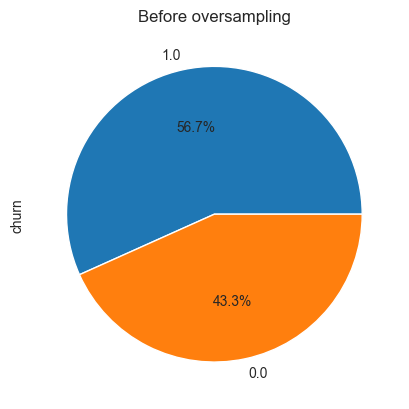

In [47]:
#As i remembered, the target variable is imbalanced.
#So we need to oversampling this dataset before we train the model
df2.churn.value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Before oversampling');

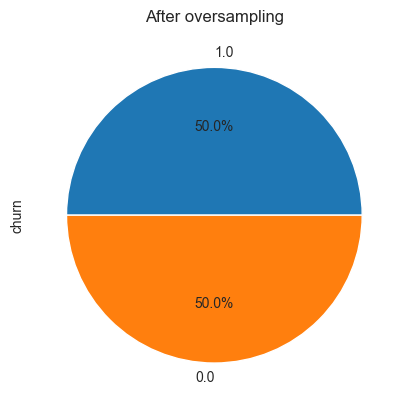

In [48]:
# Implemente Ovesampling in training dataset(X_train,Y_train).
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_train, Y_train = ros.fit_resample(X_train,Y_train)
ax = Y_train.value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('After oversampling');

In [49]:
# Show the shape of target variables of oversampling.
print(Y_train.value_counts())

1.0    187595
0.0    187595
Name: churn, dtype: int64


# Feature Selection

In [50]:
# We will perform feature selection by using feature importance method.
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(n_estimators = 25 , random_state = 45)

In [52]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25, random_state=45)

In [53]:
model.feature_importances_

array([0.0340759 , 0.00085946, 0.00095243, 0.13766043, 0.00466235,
       0.00831368, 0.13617506, 0.00331339, 0.3129925 , 0.13318094,
       0.1927528 , 0.03506106])

In [54]:
featureimp = pd.Series(model.feature_importances_ , index = X.columns).sort_values(ascending = True)

<Axes: >

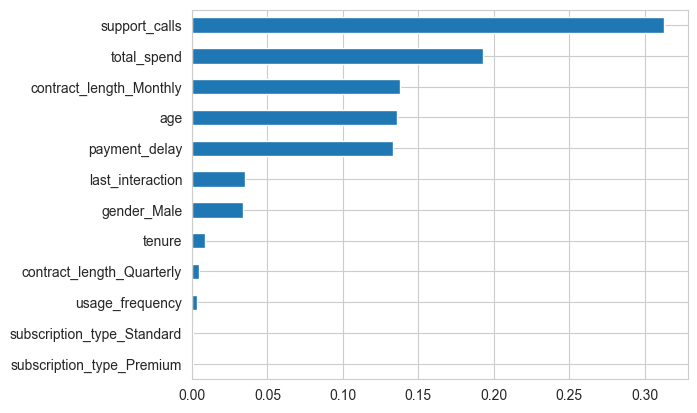

In [55]:
featureimp.plot(kind = 'barh')

- We decided to drop the features with five lowest feature importancce score.

In [56]:
X_train = X_train.drop(columns = ['tenure','contract_length_Quarterly','usage_frequency','subscription_type_Standard','subscription_type_Premium'])
X_train

gender_Male  contract_length_Monthly       age  support_calls  \
0                 0                        0  1.577422       1.105969   
1                 0                        0  0.050380      -0.522581   
2                 1                        0  0.854086       0.454549   
3                 1                        0 -0.271102      -0.522581   
4                 1                        0  0.211121      -0.196871   
...             ...                      ...       ...            ...   
375185            1                        0  0.854086      -0.522581   
375186            1                        0 -0.431844      -0.848291   
375187            0                        0  0.612974      -1.174002   
375188            1                        0 -0.592585      -1.174002   
375189            0                        0 -0.190732      -0.848291   

        payment_delay  total_spend  last_interaction  
0            0.004151    -0.758364          0.293052  
1           -0.964600    -0.350603         -0.521262  
2            0.246339     1.009140         -0.172270  
3            0.488527    -0.463600          1.572687  
4           -1.085694     0.627417          0.176721  
...               ...          ...               ...  
375185      -0.480225     1.442067          1.805348  
375186      -0.480225     0.163220          1.805348  
375187      -0.964600     1.131689         -1.335575  
375188      -0.843507     0.325469         -1.568236  
375189      -1.085694    -0.274732         -1.335575  

[375190 rows x 7 columns]

In [57]:
X_test = X_test.drop(columns = ['tenure','contract_length_Quarterly','usage_frequency','subscription_type_Standard','subscription_type_Premium'])
X_test

gender_Male  contract_length_Monthly       age  support_calls  \
41587             0                        0  1.979275       0.780259   
66720             0                        1  1.095198       0.454549   
70078             0                        0 -0.512214      -0.196871   
306910            0                        0 -1.074809      -1.174002   
147023            0                        0 -0.833697      -1.174002   
...             ...                      ...       ...            ...   
186861            0                        0  0.371863      -0.522581   
1115              0                        1  1.175569       0.128839   
124922            0                        0 -0.190732       0.128839   
27489             1                        0 -0.592585       1.105969   
377709            1                        0 -0.431844      -0.522581   

        payment_delay  total_spend  last_interaction  
41587        1.457278     1.479982          1.340026  
66720       -0.964600     0.632816          0.874704  
70078        1.820560     0.296441          1.456357  
306910      -0.601319     1.486751         -0.637592  
147023       0.488527    -1.285767         -1.451906  
...               ...          ...               ...  
186861       0.730714    -1.223475         -0.637592  
1115         1.457278     0.495774          1.107365  
124922       1.578372     0.798927         -0.172270  
27489       -0.601319    -0.617170         -1.568236  
377709      -0.964600     1.258182         -0.986584  

[110208 rows x 7 columns]

# Select Model

In [58]:
# Using lazypredict libaray as a guideline for selecting model.
import sklearn
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [59]:
# Check the list of models
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [60]:
# Select some models from the list above.
lazypredict.Supervised.CLASSIFIERS = lazypredict.Supervised.CLASSIFIERS[0:10] + lazypredict.Supervised.CLASSIFIERS[15:16]
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression)]

In [61]:
# Run models
clf = LazyClassifier(verbose= 1,ignore_warnings=True, custom_metric= None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models


  9%|███████▌                                                                           | 1/11 [00:11<01:54, 11.42s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9799197880371661, 'Balanced Accuracy': 0.98178424518432, 'ROC AUC': 0.98178424518432, 'F1 Score': 0.9799587115709418, 'Time taken': 11.416557788848877}


 18%|███████████████                                                                    | 2/11 [00:19<01:27,  9.75s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9975682346109176, 'Balanced Accuracy': 0.9978355722677205, 'ROC AUC': 0.9978355722677205, 'F1 Score': 0.9975689767444431, 'Time taken': 8.579623937606812}


 27%|██████████████████████▋                                                            | 3/11 [00:20<00:43,  5.45s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.8510362224157956, 'Balanced Accuracy': 0.8543399230542856, 'ROC AUC': 0.8543399230542855, 'F1 Score': 0.8516222440066625, 'Time taken': 0.3450775146484375}


 45%|█████████████████████████████████████▋                                             | 5/11 [01:07<01:23, 14.00s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8962960946573751, 'Balanced Accuracy': 0.900134227963123, 'ROC AUC': 0.900134227963123, 'F1 Score': 0.8966944296290389, 'Time taken': 46.9519739151001}


 55%|█████████████████████████████████████████████▎                                     | 6/11 [01:08<00:48,  9.71s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9946918554006968, 'Balanced Accuracy': 0.9945052677307624, 'ROC AUC': 0.9945052677307624, 'F1 Score': 0.9946913657060242, 'Time taken': 1.3783085346221924}


 64%|████████████████████████████████████████████████████▊                              | 7/11 [01:09<00:26,  6.61s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.4337616144018583, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.2624552592824144, 'Time taken': 0.23005175590515137}


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [01:09<00:13,  4.65s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9796385017421603, 'Balanced Accuracy': 0.9798008918336503, 'ROC AUC': 0.9798008918336503, 'F1 Score': 0.979648888054077, 'Time taken': 0.43709707260131836}


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [01:28<00:18,  9.27s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9957171893147503, 'Balanced Accuracy': 0.9961619085573293, 'ROC AUC': 0.9961619085573293, 'F1 Score': 0.995719354267144, 'Time taken': 19.43435502052307}


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [01:29<00:06,  6.50s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.7538291231126597, 'Balanced Accuracy': 0.7826261137106596, 'ROC AUC': 0.7826261137106596, 'F1 Score': 0.7468490216346004, 'Time taken': 0.3030681610107422}


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:29<00:00,  8.17s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.8962960946573751, 'Balanced Accuracy': 0.9001219926187177, 'ROC AUC': 0.9001219926187178, 'F1 Score': 0.8966939792701785, 'Time taken': 0.7221622467041016}


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
BaggingClassifier           1.00               1.00     1.00      1.00   
ExtraTreesClassifier        1.00               1.00     1.00      1.00   
DecisionTreeClassifier      0.99               0.99     0.99      0.99   
AdaBoostClassifier          0.98               0.98     0.98      0.98   
ExtraTreeClassifier         0.98               0.98     0.98      0.98   
CalibratedClassifierCV      0.90               0.90     0.90      0.90   
LogisticRegression          0.90               0.90     0.90      0.90   
BernoulliNB                 0.85               0.85     0.85      0.85   
GaussianNB                  0.75               0.78     0.78      0.75   
DummyClassifier             0.43               0.50     0.50      0.26   

                        Time Taken  
Model                               
BaggingClassifier             8.58  
ExtraTreesClassifier         19.43  
DecisionTreeClassifier        1.38  
AdaBoostClassifier           11.42  
ExtraTreeClassifier           0.44  
CalibratedClassifierCV       46.95  
LogisticRegression            0.72  
BernoulliNB                   0.35  
GaussianNB                    0.30  
DummyClassifier               0.23

- Select Bagging Classifier model as it has the highest accuracy and take the least amount of time.

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_model = BaggingClassifier(base_estimator = DecisionTreeClassifier() , n_estimators = 10 , max_samples = 0.8 , oob_score = True, random_state = 0)

In [77]:
# Accuracy in train dataset
bagging_model.fit(X_train,Y_train)
bagging_model.oob_score_

0.9962019243583251

In [64]:
# Accuracy in test dataset
bagging_model.score(X_test,Y_test)

0.9976136033681765

# Explaining Model

In [72]:
#Use lime library to explain the model.
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(training_data = np.array(X_train),
                                               feature_names = X_train.columns,
                                                mode = 'classification')

In [73]:
exp = interpretor.explain_instance(data_row = X_test.iloc[1234],
                                  predict_fn = bagging_model.predict_proba,
                                  num_features = 7)
exp.show_in_notebook(show_table = True)

In [86]:
exp = interpretor.explain_instance(data_row = X_test.iloc[11],
                                  predict_fn = bagging_model.predict_proba,
                                  num_features = 7)
exp.show_in_notebook(show_table = True)

In [96]:
exp = interpretor.explain_instance(data_row = X_test.iloc[333],
                                  predict_fn = bagging_model.predict_proba,
                                  num_features = 7)
exp.show_in_notebook(show_table = True)

**According to the explainer above, we can draw the following conclusions**
1. Female customers prone to churn more than male.
2. Customer with age more than an average (40 years old) has higher probability of churn.
3. Customer with short-term contract (Monthly contract) tends to churn more than customer with long-term contract (Quaterly and Annual)
4. Customer who call for supports more than four times increase the probability of churn.
5. Customer with payment delay higher than an average of the sample (12 months) has higher proablity to churn.
6. Customer with lower spending score tends to churn more than customer with higher spending score.
7. Customer with up to date interaction tends to churn less.